#Credit Card Fraud Detection

## Objective
Identify **fraudulent credit card transactions** using machine learning.

## Dataset Overview
The dataset contains anonymized credit card transactions labeled as fraud or not.

- `Time`, `Amount`, and anonymized features `V1` to `V28`
- `Class`: 1 for fraud, 0 for non-fraud

## Workflow
1. Load and explore the dataset
2. Handle class imbalance
3. Feature scaling and model training
4. Evaluate performance

In [11]:
import pandas as pd

# Load the dataset
file_path = "/content/creditcard.csv"
df = pd.read_csv(file_path)

info = df.info()
head = df.head()

info, head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128821 entries, 0 to 128820
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    128821 non-null  int64  
 1   V1      128821 non-null  float64
 2   V2      128821 non-null  float64
 3   V3      128821 non-null  float64
 4   V4      128821 non-null  float64
 5   V5      128821 non-null  float64
 6   V6      128821 non-null  float64
 7   V7      128821 non-null  float64
 8   V8      128821 non-null  float64
 9   V9      128821 non-null  float64
 10  V10     128821 non-null  float64
 11  V11     128821 non-null  float64
 12  V12     128821 non-null  float64
 13  V13     128821 non-null  float64
 14  V14     128821 non-null  float64
 15  V15     128821 non-null  float64
 16  V16     128820 non-null  float64
 17  V17     128820 non-null  float64
 18  V18     128820 non-null  float64
 19  V19     128820 non-null  float64
 20  V20     128820 non-null  float64
 21  V21     12

(None,
    Time        V1        V2        V3        V4        V5        V6        V7  \
 0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
         V2

## Exploratory Data Analysis

/tmp/ipython-input-5-944271289.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='pastel')


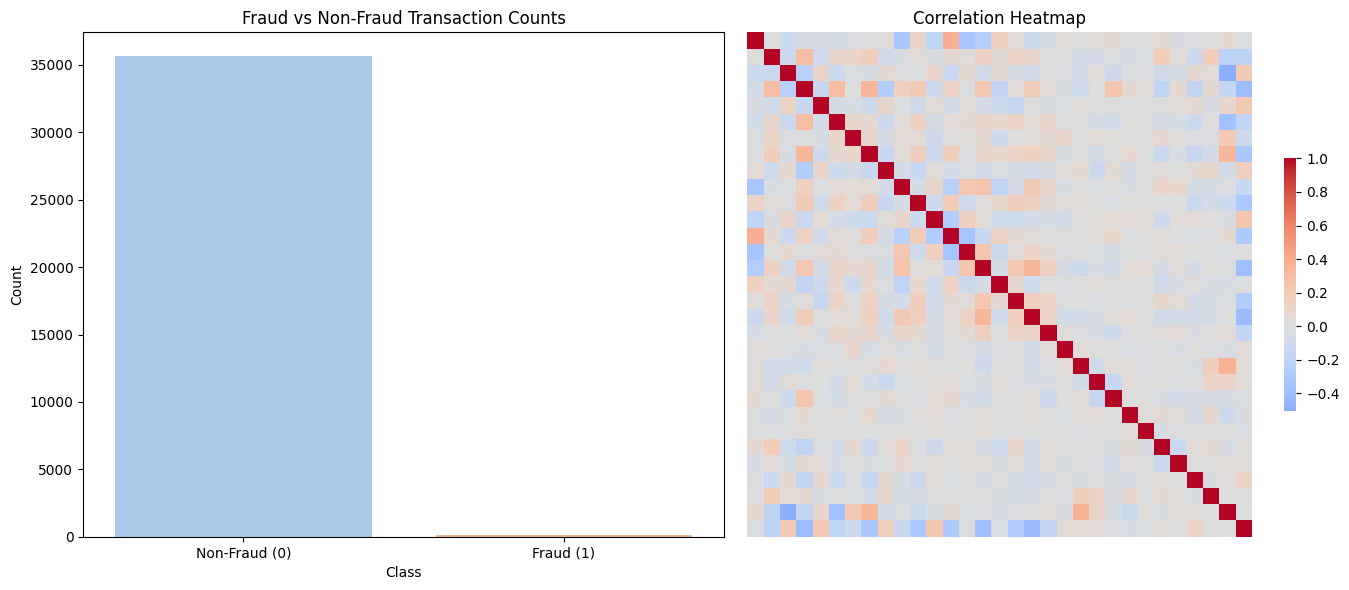

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of fraud vs non-fraud transactions
fraud_counts = df['Class'].value_counts()

corr_matrix = df.corr()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='pastel')
plt.title("Fraud vs Non-Fraud Transaction Counts")
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel("Count")

# Correlation heatmap
plt.subplot(1, 2, 2)
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True, cbar_kws={'shrink': 0.5}, xticklabels=False, yticklabels=False)
plt.title("Correlation Heatmap")

plt.tight_layout()
plt.show()


## Data Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Feature scaling for 'Amount' and 'Time'
df['scaled_Amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_Time'] = scaler.fit_transform(df[['Time']])

# Drop original
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Rearranging columns
columns = ['scaled_Time', 'scaled_Amount'] + [col for col in df.columns if col not in ['scaled_Time', 'scaled_Amount', 'Class']] + ['Class']
df = df[columns]

df.columns.tolist()


['scaled_Time',
 'scaled_Amount',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Class']

## Model Training

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = df.dropna(subset=['Class'])

X = df.drop('Class', axis=1)
y = df['Class']

print("Unique values in y:", y.unique())

# Ensure target is of correct type
y = y.astype(int)

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))


Unique values in y: [0. 1.]
X_train shape: (90174, 30)
X_test shape: (38646, 30)
y_train distribution:
 Class
0    0.997971
1    0.002029
Name: proportion, dtype: float64
y_test distribution:
 Class
0    0.997982
1    0.002018
Name: proportion, dtype: float64


In [18]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
model = LogisticRegression(solver='saga', max_iter=1000, random_state=42)

model.fit(X_train, y_train)

print("Model training complete.")
print("Intercept:", model.intercept_)
print("Number of coefficients:", len(model.coef_[0]))


Model training complete.
Intercept: [-8.27842696]
Number of coefficients: 30


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Confusion Matrix:
[[38554    14]
 [   39    39]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9990    0.9996    0.9993     38568
           1     0.7358    0.5000    0.5954        78

    accuracy                         0.9986     38646
   macro avg     0.8674    0.7498    0.7974     38646
weighted avg     0.9985    0.9986    0.9985     38646

